# Influencer Performance Study — Programa de Parcerias



## 🎯 Contexto do Projeto

Este projeto é um estudo de caso fictício, baseado em dados simulados, sobre os resultados de um programa de parcerias com influenciadores digitais de uma marca do setor de vestuário.

A proposta é analisar a base de influenciadores, entender padrões de performance e apresentar recomendações estratégicas para otimizar o investimento em mídia de influência.

O dataset contempla diferentes variáveis, como seguidores, custos, novos compradores e receita gerada por influenciador, permitindo análises quantitativas orientadas a negócio.


## 📌 Objetivos do Estudo
Responder às seguintes perguntas de negócio:

1.Como atingir a meta de COS de 70%? 

2.Como aumentar a receita em 50%?

3.Quais influenciadores parceiros devem ser promovidos para o squad fixo? Selecione 10 nomes.


## 📁 Sobre o Dataset
### 📁 Sobre o Dataset

O dataset simula resultados de um programa de parcerias com influenciadores digitais em uma marca de vestuário. Cada linha representa um influenciador e seus respectivos resultados em uma campanha.

| Variável           | Descrição                                                                 |
|--------------------|---------------------------------------------------------------------------|
| **Influencer Name**| Nome (ou ID) do influenciador                                              |
| **IG Followers**   | Número de seguidores no Instagram                                          |
| **Fixed Fee**      | Valor fixo pago (apenas para influenciadores do squad fixo)               |
| **Commission**     | Comissão sobre as vendas realizadas                                        |
| **Bonus**          | Bônus por novos compradores (ex: R$ 50 por novo comprador)                 |
| **Total Cost**     | Soma de todos os custos: `Fixed Fee + Commission + Bonus + 10% comissão`  |
| **New Buyers**     | Número de novos compradores gerados                                        |
| **Revenue**        | Receita total gerada pelo influenciador (estimada via ticket médio x compradores) |
| **COS**            | Custo sobre receita: `Total Cost / Revenue`                               |
| **CAC**            | Custo de aquisição por cliente: `Total Cost / New Buyers`                 |



## ⚙️ Metodologia

O projeto será conduzido em quatro etapas principais:

Pré-processamento e cálculo de métricas

Análise descritiva e visualização dos dados

Resolução das perguntas de negócio

Conclusão e recomendações estratégicas

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


## Importando a base

In [2]:
df = pd.read_excel(r'C:\Users\Mário\Documents\Mario Workspace\Data_Science_Estudos\Influencer Study/Influencers_Case_Fake.xlsx')
df.head()

,Influencer Name,IG Followers,Total Cost,Fixed Fee,Cost of credits,Commission (10%),Bonus for New Buyers (R$50/new buyer),Gross Revenue,New Buyers,COS,CAC
0,1,181278,4811.573,0,500,1011.573,3300,10115.73,66,0.475653,72.902621
1,2,189235,784.942,0,500,234.942,50,2349.42,1,0.334100,784.942000
2,3,663148,14485.634,5770,500,1765.634,6450,17656.34,129,0.820421,112.291736
3,4,103010,663.694,0,500,113.694,50,1136.94,1,0.583755,663.694000
4,5,34798,581.045,0,500,31.045,50,310.45,1,1.871622,581.045000


In [3]:
# Chegando o tamanho do dataset
df.shape

(200, 11)

In [4]:
#checando a qualidade dos dados
df.isnull().sum()

Influencer Name                          0
IG Followers                             0
Total Cost                               0
Fixed Fee                                0
Cost of credits                          0
Commission (10%)                         0
Bonus for New Buyers (R$50/new buyer)    0
Gross Revenue                            0
New Buyers                               0
COS                                      0
CAC                                      0
dtype: int64

In [5]:
#checking the data types
df.dtypes


Influencer Name                            int64
IG Followers                               int64
Total Cost                               float64
Fixed Fee                                  int64
Cost of credits                            int64
Commission (10%)                         float64
Bonus for New Buyers (R$50/new buyer)      int64
Gross Revenue                            float64
New Buyers                                 int64
COS                                      float64
CAC                                      float64
dtype: object

In [6]:
#Analise descritiva
df.describe()

,Influencer Name,IG Followers,Total Cost,Fixed Fee,Cost of credits,Commission (10%),Bonus for New Buyers (R$50/new buyer),Gross Revenue,New Buyers,COS,CAC
count,200.000000,2.000000e+02,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,8.508493e+05,8773.095675,4507.815000,500.0,1175.780675,2589.500000,11757.806750,51.790000,0.631669,1252.559919
std,57.879185,2.002082e+06,16432.098004,12309.538278,0.0,1845.192283,5183.927592,18451.922828,103.678552,0.490558,4778.128866
min,1.000000,1.243800e+04,581.045000,0.000000,500.0,25.969000,50.000000,259.690000,1.000000,0.198651,54.670571
25%,50.750000,8.605050e+04,1082.030500,0.000000,500.0,339.589250,150.000000,3395.892500,3.000000,0.335300,83.274166
50%,100.500000,1.643785e+05,2349.558000,0.000000,500.0,516.398500,550.000000,5163.985000,11.000000,0.496828,182.981642
75%,150.250000,6.161482e+05,7401.123750,530.250000,500.0,1050.870500,2312.500000,10508.705000,46.250000,0.748666,634.807125
max,200.000000,9.936669e+06,108022.873000,58528.000000,500.0,10996.684000,40500.000000,109966.840000,810.000000,4.408213,47178.169000


## Criando colunas

In [7]:
# Criando clusters baseados no número de seguidores
def categoriza_influencer(followers):
    if followers < 100000:
        return 'Micro'
    elif followers < 500000:
        return 'Medium'
    elif followers < 1000000:
        return 'Big'
    else:
        return 'Macro'

df['Cluster'] = df['IG Followers'].apply(categoriza_influencer)



In [8]:
# Criando coluna para identificar tipo de influenciador (parceiro ou squad)
df['Relationship'] = df['Fixed Fee'].apply(lambda x: 'Partner' if x == 0 else 'Squad')


In [9]:
df['ROI'] = df['Gross Revenue'] / df['Total Cost']


## Analise Exploratória

Na análise exploratória, irei examinar e tentar compreender os dados. 

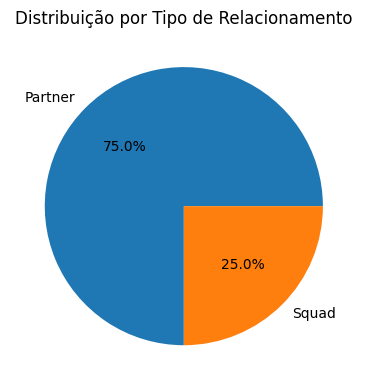


Distribuição por tipo de influenciador:
Relationship
Partner    150
Squad       50
Name: count, dtype: int64


In [10]:
# Criando gráfico de pizza para mostrar distribuição de Relationship
plt.figure(figsize=(4,4))
df['Relationship'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição por Tipo de Relacionamento')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("\nDistribuição por tipo de influenciador:")
print(df['Relationship'].value_counts())

75% do time são parceiros, ou seja, perfis que apenas recebem créditos para divulgar os produtos

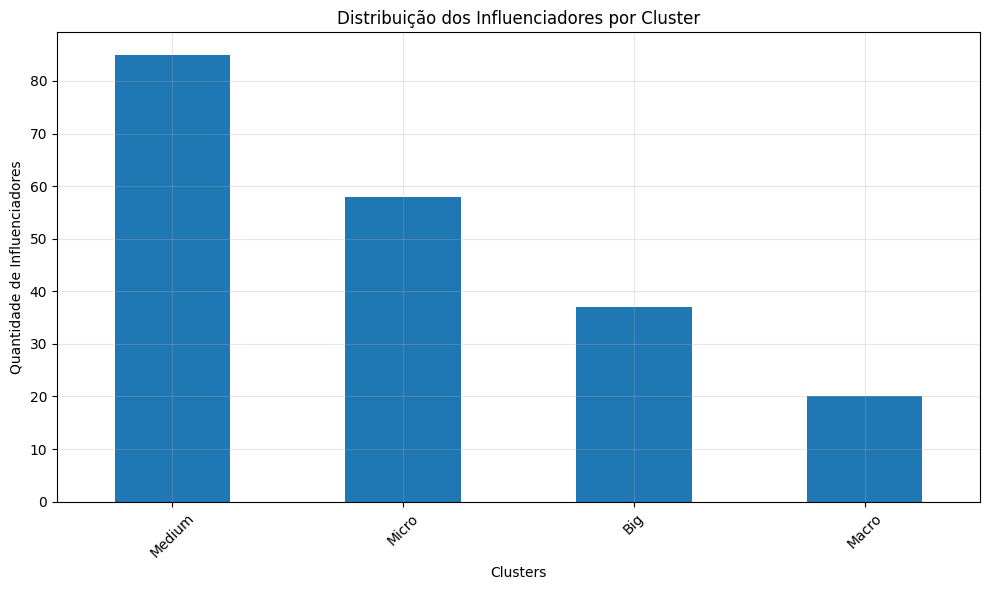


Distribuição dos Influenciadores por Cluster:
Cluster
Medium    85
Micro     58
Big       37
Macro     20
Name: count, dtype: int64


In [11]:
# Criando gráfico de barras para mostrar distribuição de Cluster
plt.figure(figsize=(10,6))
df['Cluster'].value_counts().plot(kind='bar')
plt.title('Distribuição dos Influenciadores por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Quantidade de Influenciadores')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrando também os valores numéricos
print("\nDistribuição dos Influenciadores por Cluster:")
print(df['Cluster'].value_counts())

Há uma distribuição coerente entre os cluster.
O destaque é cara perfis médios (entre 500 a 1M de seguidores)




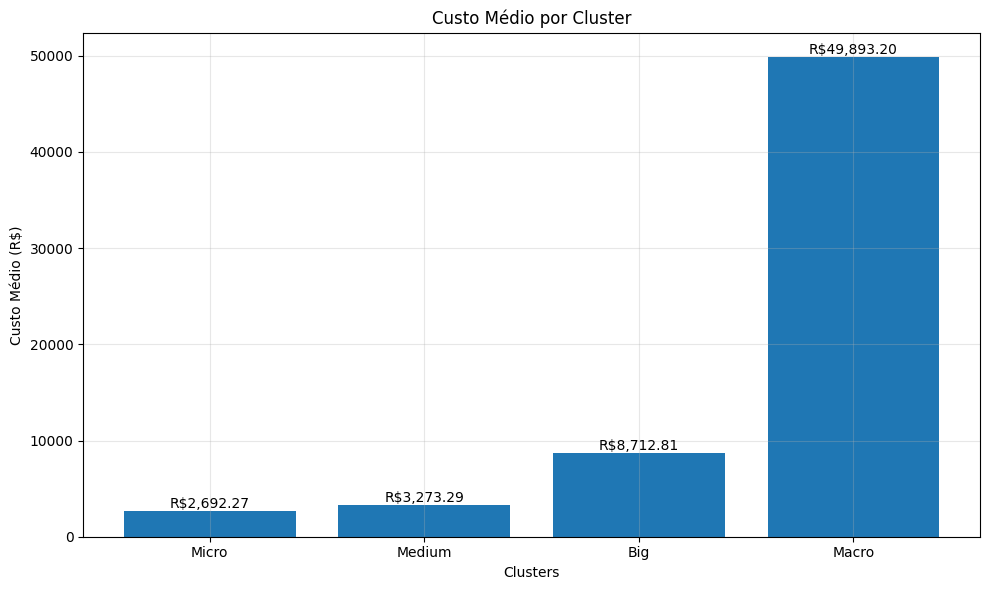


Custo Médio por Cluster:
Micro: R$2,692.27
Medium: R$3,273.29
Big: R$8,712.81
Macro: R$49,893.20


In [12]:
# Calculando o custo médio por cluster
# Definindo a ordem dos clusters
ordem_clusters = ['Micro', 'Medium', 'Big', 'Macro']

# Calculando custo médio por cluster na ordem especificada
custo_medio_cluster = df.groupby('Cluster')['Total Cost'].mean().reindex(ordem_clusters)

# Criando gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(custo_medio_cluster.index, custo_medio_cluster.values)
plt.title('Custo Médio por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Custo Médio (R$)')
plt.grid(True, alpha=0.3)

# Adicionando valores sobre as barras
for i, v in enumerate(custo_medio_cluster):
    plt.text(i, v, f'R${v:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nCusto Médio por Cluster:")
for cluster, custo in custo_medio_cluster.items():
    print(f"{cluster}: R${custo:,.2f}")


No valor gasto por cada Cluster é fica claro que o 'Macro' é o mais caro entre os 4. O que faz sentido já que é o grupo em que praticamente todos são do squad fixo, e receber para divulgação

Alguns 'Bigs' fazem parte do squad fixo, o que pode gerar um descolamento entre os dois outros clusters.

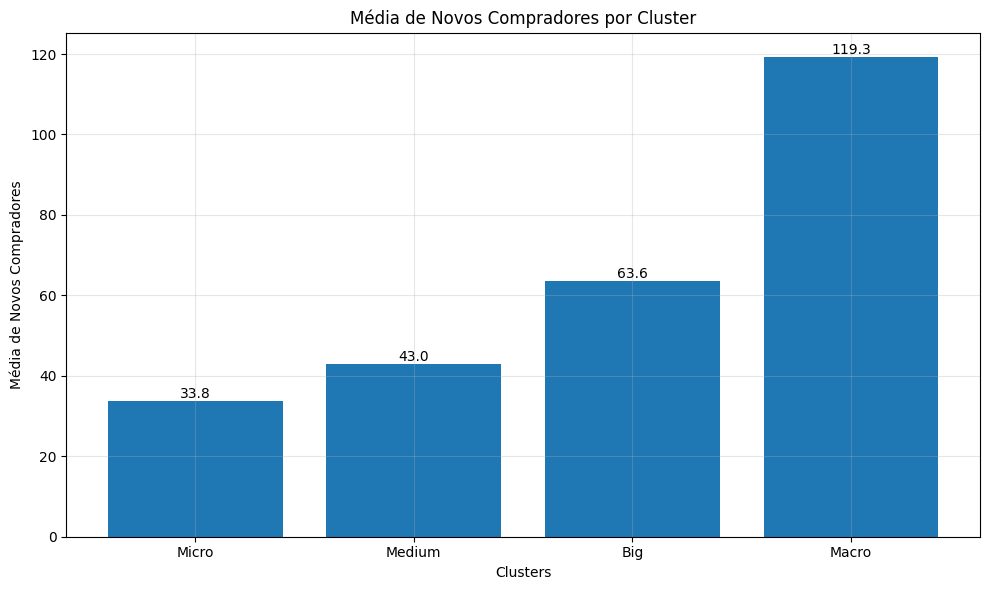


Média de Novos Compradores por Cluster:
Micro: 33.8
Medium: 43.0
Big: 63.6
Macro: 119.3


In [13]:
# Calculando média de novos compradores por cluster na ordem especificada
media_newbuyers_cluster = df.groupby('Cluster')['New Buyers'].mean().reindex(ordem_clusters)

# Criando gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(media_newbuyers_cluster.index, media_newbuyers_cluster.values)
plt.title('Média de Novos Compradores por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Média de Novos Compradores')
plt.grid(True, alpha=0.3)

# Adicionando valores sobre as barras
for i, v in enumerate(media_newbuyers_cluster):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nMédia de Novos Compradores por Cluster:")
for cluster, media in media_newbuyers_cluster.items():
    print(f"{cluster}: {media:.1f}")


Na média, quanto maior o cluster, mais novos comprados são gerados. O que faz sentido, já que com são bases de seguidores maiores


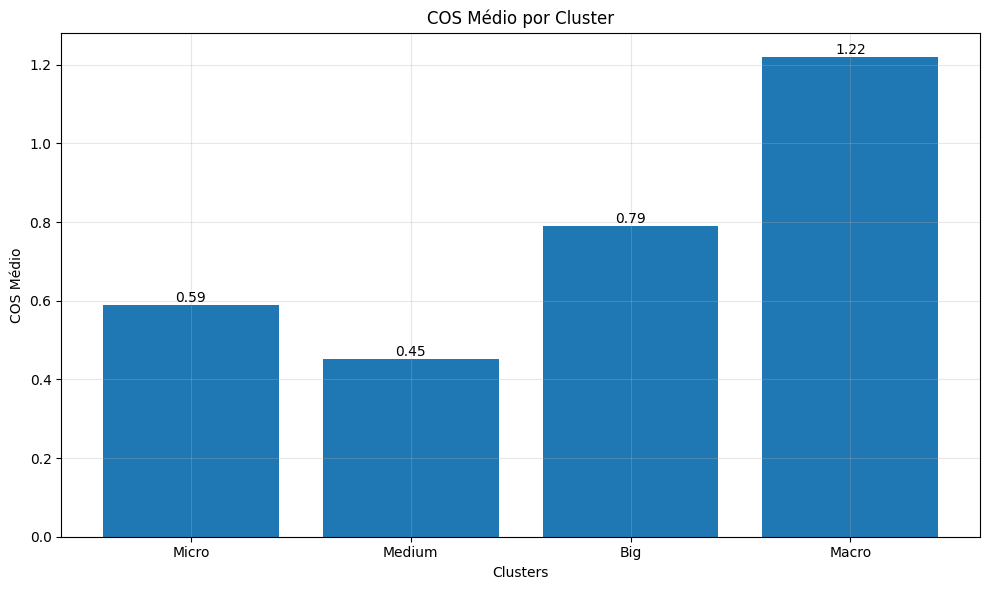


COS Médio por Cluster:
Micro: 0.59
Medium: 0.45
Big: 0.79
Macro: 1.22


In [14]:
# Calculando COS médio por cluster na ordem especificada
cos_medio_cluster = df.groupby('Cluster')['COS'].mean().reindex(ordem_clusters)

# Criando gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(cos_medio_cluster.index, cos_medio_cluster.values)
plt.title('COS Médio por Cluster')
plt.xlabel('Clusters')
plt.ylabel('COS Médio')
plt.grid(True, alpha=0.3)

# Adicionando valores sobre as barras
for i, v in enumerate(cos_medio_cluster):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nCOS Médio por Cluster:")
for cluster, cos in cos_medio_cluster.items():
    print(f"{cluster}: {cos:.2f}")


Mas vale ressaltar que o Cluster 'Macro' tem o Custo por Venda (COS) muito mais alto.

Micros é Médios possuem resultados fantasticos

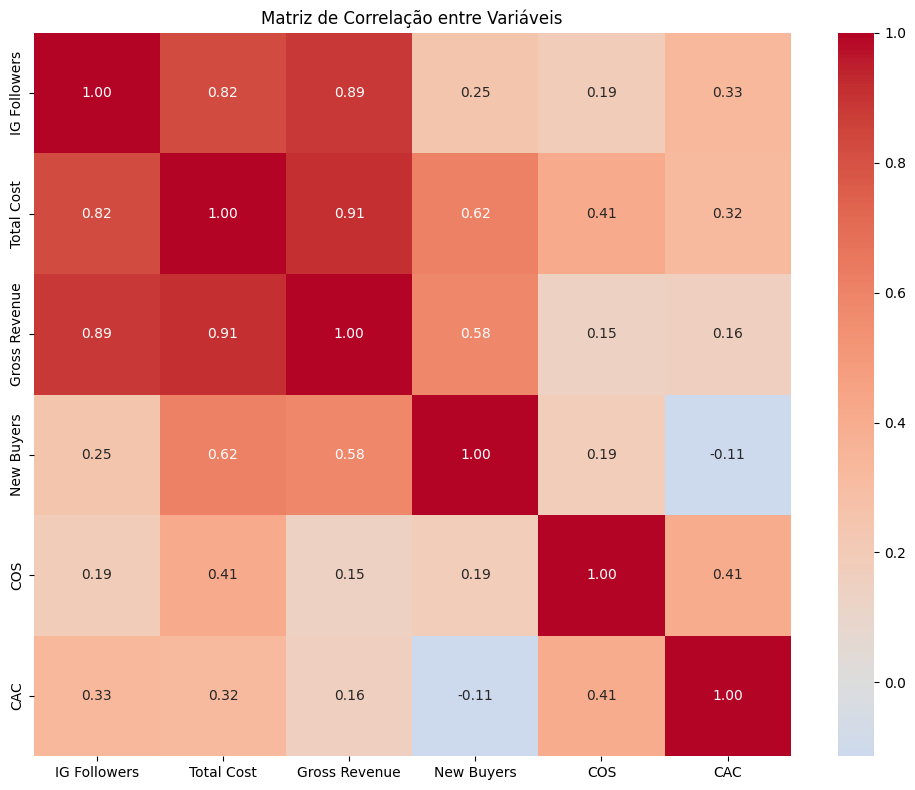

In [15]:
# Calculando a matriz de correlação
matriz_correlacao = df[['IG Followers', 'Total Cost', 'Gross Revenue', 'New Buyers', 'COS', 'CAC']].corr()

# Criando um mapa de calor (heatmap) com seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis')
plt.tight_layout()
plt.show()




Quando analisamos a matriz:

- Temos alta correlação entre Seguidores e Custo (O que faz sentido já que os perfis maiores tendem a ser pagos)
- A alta correlação entre Seguidores e receita pode ser explicado pois estes perfis tendem a gerar maiores volumes de vendas brutas
- Novos Compradores tem certa relação com Custo, mostrando que para atrair vendas é necessario investimento


In [16]:
# Criando tabela com top 15 influenciadores por custo total
top_15_custos = df.sort_values('Total Cost', ascending=False).head(15)
top_15_custos = top_15_custos[['Influencer Name', 'Total Cost', 'Cluster']]

print("Top 15 Influenciadores por Custo Total:")
print("\n", top_15_custos.to_string(index=False))


Top 15 Influenciadores por Custo Total:

  Influencer Name  Total Cost Cluster
              43  108022.873   Macro
              78   91463.442   Macro
              95   75873.732   Macro
              75   72340.358   Macro
              50   63982.385   Macro
             132   62556.663   Macro
             188   57199.684   Macro
             199   56993.241   Macro
             183   52478.277   Macro
              62   47178.169   Macro
             113   45094.907   Macro
             162   42092.763   Macro
              33   40741.762   Macro
              37   38891.264   Macro
             176   29818.429   Macro


No custo total, que leva em consideração o fee + encargos extras, apenas o cluster 'Macro' está no top 15. 

Resultado que pode ser explicado por este ser um cluster que predominantemente recebe um Fee fixo

###  Para entender o impacto do valor pago para influs por transações, fiz um calculo para ter a visão apenas da Comissão + Bonus


In [17]:
# Calculando comissões totais (comissão + bônus por novos compradores)
df['Comissoes Totais'] = df['Commission (10%)'] + df['Bonus for New Buyers (R$50/new buyer)']

# Mostrando top 15 influenciadores por comissões totais
top_15_comissoes = df.sort_values('Comissoes Totais', ascending=False).head(15)
top_15_comissoes = top_15_comissoes[['Influencer Name', 'Comissoes Totais', 'Cluster']]



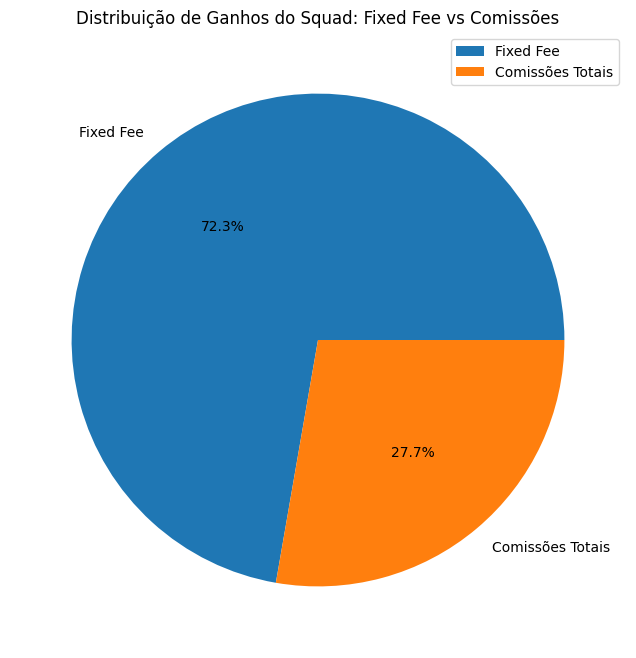


Valores totais para o Squad:
Fixed Fee Total: R$ 901,563.00
Comissões Totais: R$ 346,032.11


In [18]:
# Filtrando apenas influenciadores do Squad
squad_df = df[df['Relationship'] == 'Squad']

# Calculando as somas
soma_fee = squad_df['Fixed Fee'].sum()
soma_comissoes = squad_df['Comissoes Totais'].sum()

# Criando dados para o gráfico de pizza
valores = [soma_fee, soma_comissoes]
labels = ['Fixed Fee', 'Comissões Totais'] 

# Criando o gráfico de pizza
plt.figure(figsize=(10,8))
plt.pie(valores, labels=labels, autopct='%1.1f%%')
plt.title('Distribuição de Ganhos do Squad: Fixed Fee vs Comissões')

# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.show()

print(f"\nValores totais para o Squad:")
print(f"Fixed Fee Total: R$ {soma_fee:,.2f}")
print(f"Comissões Totais: R$ {soma_comissoes:,.2f}")


Notei que mais de 70% do valor gasto com influenciadores fixos são de fee fixo e apenas 30% são de comissões diretas por vendas.

Isso significa um grande desbalanceamento no modelo de negócios, mostrando que se deve haver uma reformulação no penso de como se trabalha com influenciadores, além de estudo aprofundado de quais perfis estão performando bem ou não.


In [19]:
# Criando tabela com top 15 influenciadores por Novos Compradores
top_15_new_buyers = df.sort_values('New Buyers', ascending=False).head(15)
top_15_new_buyers = top_15_new_buyers[['Influencer Name', 'New Buyers', 'Cluster']]

print("Top 15 Influenciadores por Novos Compradores:")
print("\n", top_15_new_buyers.to_string(index=False))


Top 15 Influenciadores por Novos Compradores:

  Influencer Name  New Buyers Cluster
              43         810   Macro
             139         527  Medium
              78         500   Macro
             153         404     Big
              18         372   Micro
              95         370   Macro
             159         365     Big
             160         331  Medium
             124         285  Medium
              94         247  Medium
              82         223     Big
              24         207  Medium
             188         193   Macro
             134         189   Micro
              75         186   Macro


Porém, quando vemos o top 15 de Novos Compradores temos uma mescla de cluster, mostrando que diferentes tamanhos de bases conseguem gerar novos clientes!


In [20]:
df.head()

,Influencer Name,IG Followers,Total Cost,Fixed Fee,Cost of credits,Commission (10%),Bonus for New Buyers (R$50/new buyer),Gross Revenue,New Buyers,COS,CAC,Cluster,Relationship,ROI,Comissoes Totais
0,1,181278,4811.573,0,500,1011.573,3300,10115.73,66,0.475653,72.902621,Medium,Partner,2.102375,4311.573
1,2,189235,784.942,0,500,234.942,50,2349.42,1,0.334100,784.942000,Medium,Partner,2.993113,284.942
2,3,663148,14485.634,5770,500,1765.634,6450,17656.34,129,0.820421,112.291736,Big,Squad,1.218886,8215.634
3,4,103010,663.694,0,500,113.694,50,1136.94,1,0.583755,663.694000,Medium,Partner,1.713048,163.694
4,5,34798,581.045,0,500,31.045,50,310.45,1,1.871622,581.045000,Micro,Partner,0.534296,81.045


### 1.Como atingir a meta de COS de 70%? 

In [21]:
# Para responder a pergunta precisamos entender primeiro a média de Custo por Venda

# Calculando a média de COS (Cost over Sales)
cos_medio = (df['Total Cost'].sum() / df['Gross Revenue'].sum()) * 100

print(f"COS Médio: {cos_medio:.2f}%")



COS Médio: 74.62%


A opção escolhida foi a otimização simples, cortando influenciadores com COS mais altos.

Primeiro passo foi verificar com Boxplot os outliers

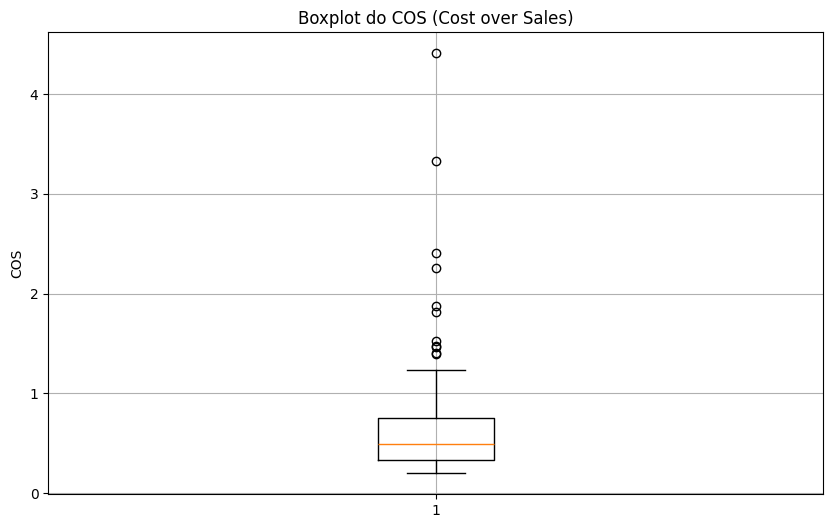


Estatísticas dos Outliers do COS:
Q1: 0.335
Q3: 0.749
IQR: 0.413
Limite Inferior: -0.285
Limite Superior: 1.369

Quantidade de outliers: 11


In [22]:
# Criando boxplot para identificar outliers no COS
plt.figure(figsize=(10,6))
plt.boxplot(df['COS'])
plt.title('Boxplot do COS (Cost over Sales)')
plt.ylabel('COS')
plt.grid(True)
plt.show()

# Calculando os quartis e limites para identificar outliers numericamente
Q1 = df['COS'].quantile(0.25)
Q3 = df['COS'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"\nEstatísticas dos Outliers do COS:")
print(f"Q1: {Q1:.3f}")
print(f"Q3: {Q3:.3f}") 
print(f"IQR: {IQR:.3f}")
print(f"Limite Inferior: {limite_inferior:.3f}")
print(f"Limite Superior: {limite_superior:.3f}")

# Identificando quantidade de outliers
outliers = df[(df['COS'] < limite_inferior) | (df['COS'] > limite_superior)]
print(f"\nQuantidade de outliers: {len(outliers)}")


Há diversos pontos fora da caixa, indicando influenciadores com COS altíssimo (acima de 10, 20, 40 e até >100). Demonstrando bom espaço para otimização

In [23]:
# Ordenando o DataFrame pelo COS em ordem decrescente e removendo os 10 maiores
df_sem_top10_cos = df.sort_values('COS', ascending=False).iloc[10:].copy()

# Calculando o novo COS médio sem os 10 maiores
novo_cos_medio = (df_sem_top10_cos['Total Cost'].sum() / df_sem_top10_cos['Gross Revenue'].sum()) * 100

print(f"COS Médio Original: {cos_medio:.2f}%")
print(f"COS Médio sem os 10 maiores: {novo_cos_medio:.2f}%")
print(f"Redução: {cos_medio - novo_cos_medio:.2f}%")

# Visualizando os 10 influenciadores removidos
print("\nInfluenciadores com maior COS removidos:")
top_10_cos = df.nlargest(10, 'COS')[['Influencer Name', 'COS', 'Total Cost', 'Gross Revenue']]
top_10_cos['COS'] = top_10_cos['COS'] * 100  # Convertendo para percentual
print(top_10_cos.to_string(float_format=lambda x: '{:.2f}%'.format(x) if 'COS' in str(x) else '{:.2f}'.format(x)))



COS Médio Original: 74.62%
COS Médio sem os 10 maiores: 67.83%
Redução: 6.78%

Influenciadores com maior COS removidos:
     Influencer Name    COS  Total Cost  Gross Revenue
175              176 440.82    29818.43        6764.29
182              183 332.93    52478.28       15762.77
132              133 241.04      625.97         259.69
61                62 226.04    47178.17       20871.69
4                  5 187.16      581.04         310.45
7                  8 181.79     6496.36        3573.65
170              171 152.82     7263.29        4752.87
49                50 146.94    63982.39       43543.85
138              139 146.89    28811.39       19613.91
142              143 140.87     1184.06         840.56


Apenas retirando os 10 piores influenciadores em 'COS' haveria uma diminuição de 74% para 69%. 

Isso faria bater o objetivo de forma rapida e fácil, porém outras tomadas de decisões ajudariam a otimizar ainda mais!

### Como aumentar a receita em 50%? 

O cenário escolhido foi substituir os influs em que o COS está alta, ou não compensa, substituir por outros, imaginando que tenham uma média ok e aumentar o investimento nos melhores para chegar na meta.

Entendendo o objetivo

In [24]:
# Receita atual
receita_atual = df['Gross Revenue'].sum()

# Meta: aumentar em 50%
meta_receita = receita_atual * 1.5

# Formatando os valores com separador de milhar e duas casas decimais
receita_atual = f"{receita_atual:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
meta_receita = f"{meta_receita:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

receita_atual, meta_receita



('2.351.561,35', '3.527.342,02')

Clusterizando os influenciadores por COS

In [25]:
# Etapa 2: Separar influenciadores com COS alto (> 0.6) e COS bom (<= 0.6)
influs_ruins = df[df['COS'] > 0.6].copy()
influs_bons = df[df['COS'] <= 0.6].copy()

# Ver quantos influenciadores temos em cada grupo
qtd_ruins = influs_ruins.shape[0]
qtd_bons = influs_bons.shape[0]

qtd_ruins, qtd_bons


(81, 119)

Calculando o quanto os piores influenciadore estão custando e quanto estão gerando de receita

In [26]:
# Etapa 3: Calcular custo e receita dos influenciadores "ruins"
custo_ruins = influs_ruins['Total Cost'].sum()
receita_ruins = influs_ruins['Gross Revenue'].sum()

# Formatar os valores para visualização
custo_ruins = f"{custo_ruins:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
receita_ruins = f"{receita_ruins:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

print(custo_ruins, receita_ruins)

1.365.916,79 1.417.047,90


In [27]:
# Recalcular os valores como float
custo_ruins = influs_ruins['Total Cost'].sum()
receita_ruins = influs_ruins['Gross Revenue'].sum()

# Calcular o delta
delta_ruins = receita_ruins - custo_ruins

# Mostrar com formatação
print(f"Delta: R$ {delta_ruins:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print('Entre os piores influenciadores com relação ao COS, há um delta positivo de apenas 51k reais, ou seja investindo muito e tendo pouco em troca. Havendo muito espaço para melhora')



Delta: R$ 51.131,11
Entre os piores influenciadores com relação ao COS, há um delta positivo de apenas 51k reais, ou seja investindo muito e tendo pouco em troca. Havendo muito espaço para melhora


Pegamos os R$ 1.365.916,79 que seriam economizados ao remover os influenciadores de alto COS, e os reinvestimos proporcionalmente entre os influenciadores com boa performance.


In [28]:
# Etapa 4: Reinvestir o custo dos ruins proporcionalmente entre os bons

# Calcular o total investido atualmente entre os bons
verba_bons = influs_bons['Total Cost'].sum()

# Calcular a proporção de verba de cada influenciador bom
influs_bons['Proporcao_Verba'] = influs_bons['Total Cost'] / verba_bons

# Reinvestir o valor dos ruins proporcionalmente
influs_bons['Novo_Investimento'] = influs_bons['Total Cost'] + (influs_bons['Proporcao_Verba'] * custo_ruins)

# Ver algumas amostras para conferir
influs_bons[['Influencer Name', 'Total Cost', 'Proporcao_Verba', 'Novo_Investimento']].head()


,Influencer Name,Total Cost,Proporcao_Verba,Novo_Investimento
0,1,4811.573,0.012379,21719.647859
1,2,784.942,0.002019,3543.262012
3,4,663.694,0.001707,2995.943315
5,6,1028.637,0.002646,4643.311743
8,9,810.763,0.002086,3659.819119


realizando a RECEITA ESTIMADA com a nova distribuição

In [29]:
# Etapa 5: Estimar nova receita proporcional ao novo investimento
influs_bons['Receita_Estimada'] = influs_bons['Gross Revenue'] * (influs_bons['Novo_Investimento'] / influs_bons['Total Cost'])

# Formatar os números para visualização amigável
resultado = influs_bons[['Influencer Name', 'Gross Revenue', 'Total Cost', 'Novo_Investimento', 'Receita_Estimada']].head().copy()

for col in ['Gross Revenue', 'Total Cost', 'Novo_Investimento', 'Receita_Estimada']:
    resultado[col] = resultado[col].apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

resultado



,Influencer Name,Gross Revenue,Total Cost,Novo_Investimento,Receita_Estimada
0,1,"R$ 10.115,73","R$ 4.811,57","R$ 21.719,65","R$ 45.662,84"
1,2,"R$ 2.349,42","R$ 784,94","R$ 3.543,26","R$ 10.605,38"
3,4,"R$ 1.136,94","R$ 663,69","R$ 2.995,94","R$ 5.132,20"
5,6,"R$ 4.286,37","R$ 1.028,64","R$ 4.643,31","R$ 19.348,86"
8,9,"R$ 2.107,63","R$ 810,76","R$ 3.659,82","R$ 9.513,93"


Resultado final

In [30]:
# Etapa 6: Somar a nova receita total estimada
nova_receita_total = influs_bons['Receita_Estimada'].sum()

# Formatando o resultado para visualização
nova_receita_total = f"{nova_receita_total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

nova_receita_total


'4.218.433,98'

### A redistribuição da verba dos influenciadores com COS alto para perfis com desempenho médio e COS abaixo de 0.6 ultrapassou a meta de aumento de 50% na receita — sem aumentar o orçamento total


### 3. Quais influenciadores parceiros devem ser promovidos para o squad fixo? Selecione 10 nomes.

Primeiro apliquei um filtro para selecionar todos os parceiros que nao são remunerados

In [31]:
# Etapa 1: Filtrar influenciadores do tipo "Partner"
partners = df[df['Relationship'] == 'Partner'].copy()

# Ver quantos temos
qtd_partners = partners.shape[0]
qtd_partners


150

Apliquei um segundo filtro para desconsiderar os COS altos, que não compensam para a marca

In [32]:
# Etapa 2: Filtrar parceiros com COS eficiente (<= 0.6)
partners_eficientes = partners[partners['COS'] <= 0.6].copy()

# Ver quantos restaram após o filtro
qtd_eficientes = partners_eficientes.shape[0]
qtd_eficientes


110

O método escolhido foi rankear os influenciadores pelas métricas CAC e Receita e Novos Compradores
COS não foi utilizado já que o seu custo está atrelado a performance

In [33]:
# Etapa 3: Criar rankings para cada métrica

# Menor COS e CAC são melhores
partners_eficientes['CAC_rank'] = partners_eficientes['CAC'].rank(method='min')

# Maior receita e maior número de compradores são melhores → rank invertido (rank mais baixo = melhor)
partners_eficientes['Revenue_rank'] = partners_eficientes['Gross Revenue'].rank(ascending=False, method='min')
partners_eficientes['NewBuyers_rank'] = partners_eficientes['New Buyers'].rank(ascending=False, method='min')

# Visualizar uma amostra
partners_eficientes[['Influencer Name', 'COS', 'CAC', 'Gross Revenue', 'New Buyers',
                     'CAC_rank', 'Revenue_rank', 'NewBuyers_rank']].head()


,Influencer Name,COS,CAC,Gross Revenue,New Buyers,CAC_rank,Revenue_rank,NewBuyers_rank
0,1,0.475653,72.902621,10115.73,66,7.0,9.0,7.0
1,2,0.334100,784.942000,2349.42,1,96.0,97.0,91.0
3,4,0.583755,663.694000,1136.94,1,91.0,110.0,91.0
5,6,0.239979,514.318500,4286.37,2,86.0,54.0,77.0
8,9,0.384680,405.381500,2107.63,2,78.0,101.0,77.0


Com isso criei um score que usa o rank como pontuação

In [34]:
partners_eficientes['score'] = partners_eficientes['Revenue_rank'] + partners_eficientes['NewBuyers_rank']

partners_eficientes[['Influencer Name', 'CAC_rank', 'Revenue_rank' ,'NewBuyers_rank', 'score']].head(15).sort_values(by='score')

,Influencer Name,CAC_rank,Revenue_rank,NewBuyers_rank,score
13,14,2.0,1.0,2.0,3.0
0,1,7.0,9.0,7.0,16.0
26,27,6.0,12.0,9.0,21.0
15,16,23.0,37.0,24.0,61.0
27,28,20.0,43.0,22.0,65.0
12,13,19.0,48.0,21.0,69.0
25,26,53.0,49.0,52.0,101.0
5,6,86.0,54.0,77.0,131.0
10,11,38.0,99.0,42.0,141.0
30,31,75.0,77.0,73.0,150.0


Com isso, os influenciadores escolhidos seriam 14, 1, 27, 16, 28, 13, 26, 6, 11 e 31!


EXTRA, quanto colocar de valor fixo?


In [35]:
# Filtrar apenas os influenciadores escolhidos: 14, 1, 27, 16, 28, 13, 26, 6, 11, 31
ids_escolhidos = [14, 1, 27, 16, 28, 13, 26, 6, 11, 31]
df_filtrado = df[df['Influencer Name'].isin(ids_escolhidos)]

# Selecionar apenas as colunas relevantes para o cálculo do Fixed Fee
colunas = [
    'Influencer Name',
    'IG Followers',
    'Gross Revenue',
    'New Buyers',
    'COS',
    'CAC'
]
df_filtrado = df_filtrado[colunas]


df_filtrado


,Influencer Name,IG Followers,Gross Revenue,New Buyers,COS,CAC
0,1,181278,10115.73,66,0.475653,72.902621
5,6,74640,4286.37,2,0.239979,514.318500
10,11,69467,2172.14,11,0.583394,115.201273
12,13,145051,4566.03,31,0.548968,80.858161
13,14,205132,21869.87,159,0.486376,66.899289
15,16,110265,5136.41,27,0.460174,87.542259
25,26,116635,4462.21,8,0.301694,168.277625
26,27,83788,9163.57,63,0.498316,72.481857
27,28,180881,4860.16,30,0.511509,82.867200
30,31,62864,3121.10,3,0.308260,320.703333


In [36]:
# Filtrar influenciadores que têm Fixed Fee (considerados "Squad")
df_squad = df[df['Fixed Fee'] > 0]

# Recalcular a mediana do Fixed Fee entre os influenciadores do Squad
benchmark_squad_fee_mediana = df_squad['Fixed Fee'].median()

# Calcular a mediana das métricas para normalização
medianas_gerais = {
    'IG Followers': df['IG Followers'].median(),
    'Gross Revenue': df['Gross Revenue'].median(),
    'New Buyers': df['New Buyers'].median(),
    'COS': df['COS'].median(),
    'CAC': df['CAC'].median()
}

# Calcular a mediana do Fixed Fee dos influenciadores do Squad
benchmark_squad_fee_mediana = df_squad['Fixed Fee'].median()

# Nova função de cálculo com base na mediana
def calcular_fixed_fee_justo(row):
    norm_followers = row['IG Followers'] / medianas_gerais['IG Followers']
    norm_revenue = row['Gross Revenue'] / medianas_gerais['Gross Revenue']
    norm_buyers = row['New Buyers'] / medianas_gerais['New Buyers']
    norm_cos = medianas_gerais['COS'] / row['COS']
    norm_cac = medianas_gerais['CAC'] / row['CAC']
    
    score = (norm_followers + norm_revenue + norm_buyers + norm_cos + norm_cac) / 5
    return score * benchmark_squad_fee_mediana

# Recalcular os valores com o novo modelo
df_filtrado['Fixed Fee Justo'] = df_filtrado.apply(calcular_fixed_fee_justo, axis=1)


df_filtrado[['Influencer Name', 'IG Followers', 'Gross Revenue', 'New Buyers', 'COS', 'CAC', 'Fixed Fee Justo']]


,Influencer Name,IG Followers,Gross Revenue,New Buyers,COS,CAC,Fixed Fee Justo
0,1,181278,10115.73,66,0.475653,72.902621,16325.327596
5,6,74640,4286.37,2,0.239979,514.318500,5036.272278
10,11,69467,2172.14,11,0.583394,115.201273,5542.483007
12,13,145051,4566.03,31,0.548968,80.858161,10032.157621
13,14,205132,21869.87,159,0.486376,66.899289,30660.315046
15,16,110265,5136.41,27,0.460174,87.542259,9433.087953
25,26,116635,4462.21,8,0.301694,168.277625,6515.420542
26,27,83788,9163.57,63,0.498316,72.481857,14923.758097
27,28,180881,4860.16,30,0.511509,82.867200,10285.048391
30,31,62864,3121.10,3,0.308260,320.703333,4453.741304


Foi estimado um valor justo de Fixed Fee para os influenciadores selecionados, considerando:

- O valor mediano pago atualmente aos influenciadores fixos (Squad),
- A performance relativa de cada perfil com base em: IG Followers, Gross Revenue, New Buyers, COS e CAC.

O cálculo usa uma média ponderada dessas variáveis e aplica um multiplicador baseado na mediana real dos pagamentos do Squad, garantindo coerência com a prática de mercado e justiça na comparação entre perfis.

Como learning é possível identificar **desequilíbrios entre a performance real de alguns influenciadores e o valor atualmente pago no formato fixo (Squad)**.

A análise fornece argumentos concretos para:

- Reavaliar os valores pagos a influenciadores do Squad com baixa performance relativa,
- Justificar aumentos para parceiros de alta performance que hoje não estão no modelo fixo,
- Guiar negociações mais equilibradas, baseadas em dados de entrega e eficiência (e não apenas tamanho de base).

Ou seja, trata-se de uma ferramenta para **otimizar o investimento** no Squad, promovendo justiça, meritocracia e melhor retorno sobre a verba alocada.


## Farol de influenciadores

### 🚦 Farol de Influenciadores

Para ter uma visão gerencial da performance dos influenciadores e facilitar as decisões de gestão de squad, criei um 'Farol', que é um sistema de avaliação que atribui notas de **0 a 10** para cada influenciador, com base em seis métricas-chave:

- **Base (Alcance)** → tamanho da audiência (IG Followers)  
- **Receita** → Gross Revenue gerado  
- **Novos Compradores** → capacidade de gerar clientes novos  
- **COS** → eficiência de custo sobre receita (quanto menor, melhor)  
- **CAC** → custo de aquisição por comprador (quanto menor, melhor)  
- **ROI** → retorno sobre investimento  

Cada métrica recebe uma nota normalizada de 0 a 10 de acordo com benchmarks definidos, e também um **sinal de farol**:

- 🔴 **Vermelho** → desempenho fraco (0 a 4)  
- 🟡 **Amarelo** → desempenho intermediário (5 a 7)  
- 🟢 **Verde** → desempenho forte (8 a 10)  

A média das seis métricas gera o **Score Final**, que também é classificado no Farol.  


In [37]:
# Função de normalização linear (0-10)
def normalizar(valor, min_val, max_val, invertido=False):
    if pd.isna(valor):
        return 0
    if invertido:
        # Quanto menor, melhor
        nota = (max_val - valor) / (max_val - min_val)
    else:
        # Quanto maior, melhor
        nota = (valor - min_val) / (max_val - min_val)
    return max(0, min(10, nota * 10))

# Aplicar normalização com benchmarks definidos
df['Nota_Base'] = df['IG Followers'].apply(lambda x: normalizar(x, 0, 1_000_000))
df['Nota_Receita'] = df['Gross Revenue'].apply(lambda x: normalizar(x, 0, 100_000))
df['Nota_Buyers'] = df['New Buyers'].apply(lambda x: normalizar(x, 0, 200))
df['Nota_COS'] = df['COS'].apply(lambda x: normalizar(x, 0.3, 1.2, invertido=True))
df['Nota_CAC'] = df['CAC'].apply(lambda x: normalizar(x, 100, 1000, invertido=True))
df['Nota_ROI'] = df['ROI'].apply(lambda x: normalizar(x, 0.5, 4.5))

# Score final como média simples
df['Score_Final'] = df[['Nota_Base','Nota_Receita','Nota_Buyers','Nota_COS','Nota_CAC','Nota_ROI']].mean(axis=1)



# Farol baseado nas faixas
def classificar_farol(score):
    if score < 4:
        return '🔴 Vermelho'
    elif score <= 7:
        return '🟡 Amarelo'
    else:
        return '🟢 Verde'

# Função de classificação por farol para notas individuais
def classificar_farol_nota(nota):
    if nota < 4:
        return '🔴'
    elif nota <= 7:
        return '🟡'
    else:
        return '🟢'

# (garanta antes que Score_Final já foi calculado)
df['Farol'] = df['Score_Final'].apply(classificar_farol)

# Criar colunas de farol para cada nota
for col in ['Nota_Base','Nota_Receita', 'Nota_Buyers','Nota_COS','Nota_CAC','Nota_ROI']:
    df[f'Farol_{col}'] = df[col].apply(classificar_farol_nota)

# Exibir resultado com faróis individuais
colunas_farol = [
    'Influencer Name',
    'Nota_Base','Farol_Nota_Base',
    'Nota_Receita','Farol_Nota_Receita',
    'Nota_Buyers','Farol_Nota_Buyers',
    'Nota_COS','Farol_Nota_COS',
    'Nota_CAC','Farol_Nota_CAC',
    'Nota_ROI','Farol_Nota_ROI',
    'Score_Final','Farol'
]

# Exibir tabela resumida
colunas_finais = [
    'Influencer Name','IG Followers', 'Gross Revenue','New Buyers','COS','CAC','ROI',
    'Nota_Base', 'Nota_Receita','Nota_Buyers','Nota_COS','Nota_CAC','Nota_ROI','Score_Final','Farol'
]

df[colunas_finais].sort_values(by='Score_Final', ascending=False).head(10)


,Influencer Name,IG Followers,Gross Revenue,New Buyers,COS,CAC,ROI,Nota_Base,Nota_Receita,Nota_Buyers,Nota_COS,Nota_CAC,Nota_ROI,Score_Final,Farol
187,188,9338108,109966.84,193,0.520154,296.371420,1.922508,10.00000,10.000000,9.65,7.553845,7.818095,3.556270,8.096368,🟢 Verde
140,141,7598954,70115.22,174,0.417977,168.428287,2.392478,10.00000,7.011522,8.70,8.689149,9.239686,4.731196,8.061925,🟢 Verde
42,43,9045063,107358.73,810,1.006186,133.361572,0.993852,10.00000,10.000000,10.00,2.153487,9.629316,1.234630,7.169572,🟢 Verde
74,75,8932099,94063.58,186,0.769058,388.926656,1.300292,10.00000,9.406358,9.30,4.788243,6.789704,2.000730,7.047506,🟢 Verde
94,95,6629622,81227.32,370,0.934091,205.064141,1.070559,10.00000,8.122732,10.00,2.954541,8.832621,1.426398,6.889382,🟡 Amarelo
81,82,917119,24797.77,223,0.725621,80.689583,1.378130,9.17119,2.479777,10.00,5.270880,10.000000,2.195326,6.519529,🟡 Amarelo
77,78,2313140,78694.42,500,1.162261,182.926884,0.860392,10.00000,7.869442,10.00,0.419324,9.078590,0.900980,6.378056,🟡 Amarelo
158,159,649074,34966.51,365,0.799155,76.557948,1.251322,6.49074,3.496651,10.00,4.453837,10.000000,1.878305,6.053256,🟡 Amarelo
101,102,586907,9166.77,19,0.258180,124.561947,3.873266,5.86907,0.916677,0.95,10.000000,9.727089,8.433165,5.982667,🟡 Amarelo
115,116,581519,8550.35,7,0.199411,243.576429,5.014765,5.81519,0.855035,0.35,10.000000,8.404706,10.000000,5.904155,🟡 Amarelo


In [38]:
df[['Influencer Name', 'Nota_Base', 'Nota_Receita', 'Nota_Buyers', 'Nota_COS', 'Nota_CAC', 'Nota_ROI', 'Score_Final', 'Farol']].sort_values(by='Score_Final', ascending=False).head(10)

,Influencer Name,Nota_Base,Nota_Receita,Nota_Buyers,Nota_COS,Nota_CAC,Nota_ROI,Score_Final,Farol
187,188,10.00000,10.000000,9.65,7.553845,7.818095,3.556270,8.096368,🟢 Verde
140,141,10.00000,7.011522,8.70,8.689149,9.239686,4.731196,8.061925,🟢 Verde
42,43,10.00000,10.000000,10.00,2.153487,9.629316,1.234630,7.169572,🟢 Verde
74,75,10.00000,9.406358,9.30,4.788243,6.789704,2.000730,7.047506,🟢 Verde
94,95,10.00000,8.122732,10.00,2.954541,8.832621,1.426398,6.889382,🟡 Amarelo
81,82,9.17119,2.479777,10.00,5.270880,10.000000,2.195326,6.519529,🟡 Amarelo
77,78,10.00000,7.869442,10.00,0.419324,9.078590,0.900980,6.378056,🟡 Amarelo
158,159,6.49074,3.496651,10.00,4.453837,10.000000,1.878305,6.053256,🟡 Amarelo
101,102,5.86907,0.916677,0.95,10.000000,9.727089,8.433165,5.982667,🟡 Amarelo
115,116,5.81519,0.855035,0.35,10.000000,8.404706,10.000000,5.904155,🟡 Amarelo


In [41]:
df[['Influencer Name', 'Farol_Nota_Base', 'Farol_Nota_Receita', 'Farol_Nota_Buyers', 'Farol_Nota_COS', 'Farol_Nota_CAC', 'Farol_Nota_ROI', 'Farol', 'Score_Final']].sort_values(by='Score_Final', ascending=False).head(10)

,Influencer Name,Farol_Nota_Base,Farol_Nota_Receita,Farol_Nota_Buyers,Farol_Nota_COS,Farol_Nota_CAC,Farol_Nota_ROI,Farol,Score_Final
187,188,🟢,🟢,🟢,🟢,🟢,🔴,🟢 Verde,8.096368
140,141,🟢,🟢,🟢,🟢,🟢,🟡,🟢 Verde,8.061925
42,43,🟢,🟢,🟢,🔴,🟢,🔴,🟢 Verde,7.169572
74,75,🟢,🟢,🟢,🟡,🟡,🔴,🟢 Verde,7.047506
94,95,🟢,🟢,🟢,🔴,🟢,🔴,🟡 Amarelo,6.889382
81,82,🟢,🔴,🟢,🟡,🟢,🔴,🟡 Amarelo,6.519529
77,78,🟢,🟢,🟢,🔴,🟢,🔴,🟡 Amarelo,6.378056
158,159,🟡,🔴,🟢,🟡,🟢,🔴,🟡 Amarelo,6.053256
101,102,🟡,🔴,🔴,🟢,🟢,🟢,🟡 Amarelo,5.982667
115,116,🟡,🔴,🔴,🟢,🟢,🟢,🟡 Amarelo,5.904155


### 📚 Learnings do Farol de Influenciadores

- ✅ Apenas **4 perfis estão em verde** → o que mostra que a régua de benchmarks está exigente e que poucos entregam performance completa em todas as métricas.  
- 📈 Perfis **maiores e com maior investimento** tendem a concentrar notas altas em Base, Receita e Buyers → isso pode estar favorecendo os grandes, mas não necessariamente garante eficiência.  
- 💸 **ROI vermelho em muitos do Top 10** → alerta de que o retorno financeiro não acompanha os altos volumes entregues. Isso indica a necessidade de revisar valores pagos ou repensar a estrutura de remuneração.  
- 🛠️ Há espaço claro para **otimização em vários perfis**, especialmente no equilíbrio entre custo e retorno.  
- ⚠️ Mesmo perfis verdes em Base e Receita apresentam **COS ou CAC vermelhos**, mostrando que podem estar **caros demais para o que entregam**.
- 🔍 O Farol evidencia que **não basta olhar apenas para números absolutos** (seguidores ou receita), é necessário avaliar eficiência (ROI, CAC, COS) para compor um Squad sustentável.  


### 🛠️ Plano de Ação para Aprimorar o Farol

1. **Métricas**  
   - Rever KPIs atuais e incluir novos (ex.: engajamento, taxa de conversão).  
   - Ajustar pesos conforme prioridade (ex.: dar mais peso para ROI do que para Base).  

2. **Benchmarks**  
   - Definir faixas realistas por cluster (Nano, Micro, Macro, Mega).  
   - Usar dados históricos e referências de mercado para calibrar a régua.  

3. **Visualização & Gestão**  
   - Criar dashboards dinâmicos para acompanhamento contínuo.  
   - Usar gráficos radar/spider para destacar pontos fortes e fracos de cada influenciador.  
